# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
   

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | yangor
City not found. Skipping...
Processing Record 8 of Set 1 | weno
Processing Record 9 of Set 1 | ciudad lazaro cardenas
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | leava
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | khromtau
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | akcakale
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | pingliang
Processing Record 21 of Set 1 | jamestown
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,10.91,64,5,3.24,AU,1691530329
1,grytviken,-54.2811,-36.5092,-3.43,80,31,3.76,GS,1691530329
2,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691530329
3,udachny,66.4167,112.4000,15.25,67,10,1.81,RU,1691530330
4,tiksi,71.6872,128.8694,15.04,53,9,1.47,RU,1691530330


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,10.91,64,5,3.24,AU,1691530329
1,grytviken,-54.2811,-36.5092,-3.43,80,31,3.76,GS,1691530329
2,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691530329
3,udachny,66.4167,112.4000,15.25,67,10,1.81,RU,1691530330
4,tiksi,71.6872,128.8694,15.04,53,9,1.47,RU,1691530330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

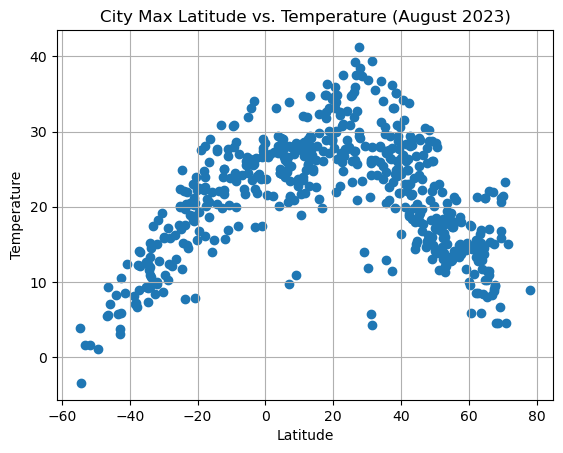

In [9]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Max Latitude vs. Temperature (August 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

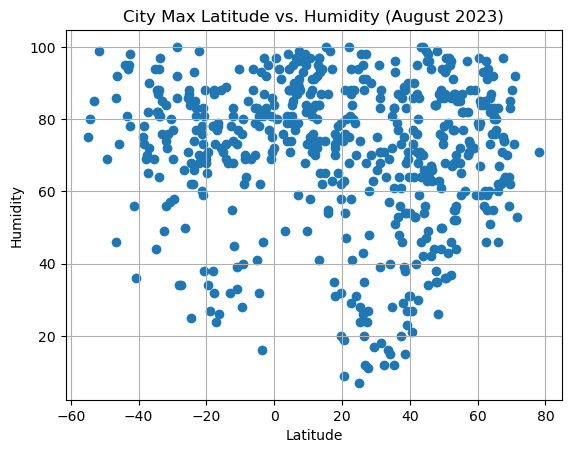

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df['Lat']
y_values=city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity (August 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

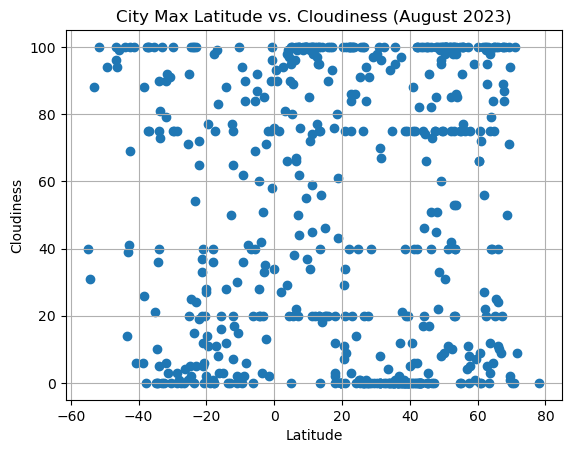

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Lat']
y_values=city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness (August 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

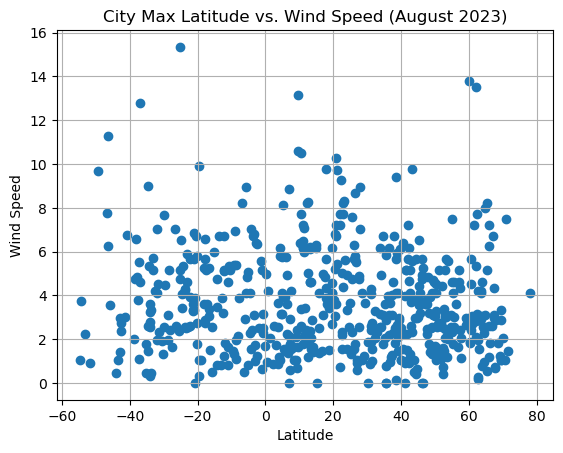

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Lat']
y_values=city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Max Latitude vs. Wind Speed (August 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x_label,y_label):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values= x_values * slope + intercept
    lin_eq=f'y= {round(slope,2)}x + {round(intercept,2)}'
    print(f'The r-value is: {rvalue**2} ')
    plt.scatter(x_values,y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values,regress_values,color="red")
    plt.annotate(lin_eq,(0,10),fontsize=15,color="red")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,udachny,66.4167,112.4000,15.25,67,10,1.81,RU,1691530330
4,tiksi,71.6872,128.8694,15.04,53,9,1.47,RU,1691530330
5,bilibino,68.0546,166.4372,4.58,64,100,2.89,RU,1691530330
6,weno,7.4515,151.8468,27.97,89,100,1.54,FM,1691530331
7,ciudad lazaro cardenas,17.9583,-102.2000,31.78,70,2,5.65,MX,1691530331


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,10.91,64,5,3.24,AU,1691530329
1,grytviken,-54.2811,-36.5092,-3.43,80,31,3.76,GS,1691530329
2,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691530329
8,west island,-12.1568,96.8225,24.99,83,75,5.14,CC,1691530331
9,leava,-14.3000,-178.1667,27.43,73,28,0.81,WF,1691530331


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3935338503218874 


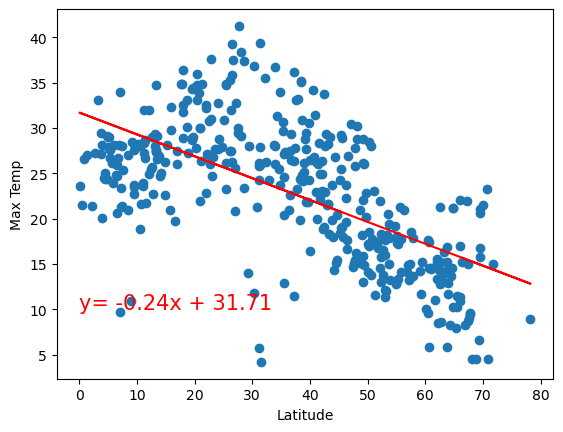

In [16]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp")

The r-value is: 0.7449664929209744 


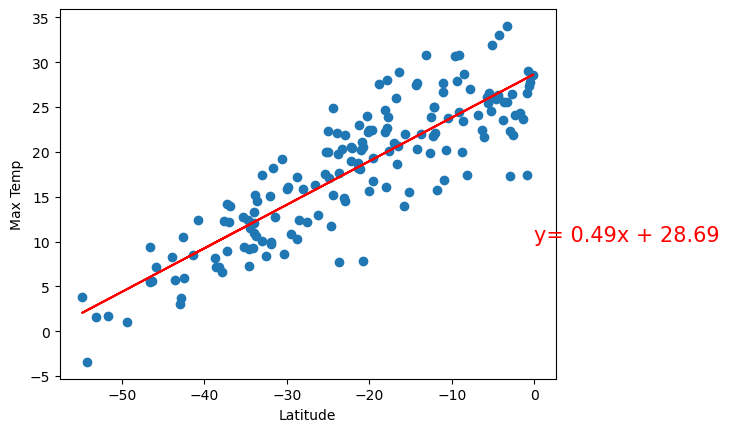

In [17]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp")

**Discussion about the linear relationship:** 
The Northern Hemisphere plot is showing the relationship between maximum temperature and latitude starting at the equator and moving towards the North Pole. The Sourthern Hemisphere plot is showing the relationship between the maximum temperature and latitude starting at the South Pole and moving towards the equator. In the Northern Hemisphere plot we see a weak negative relationship (r value of .39) meaning temperatures were generally decreasing as you moved further north.
In the Southern Hemisphere plot we see a strong positive relationship (r value of .74) meaning temperatures were generally increasing as you approached the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007355281238474227 


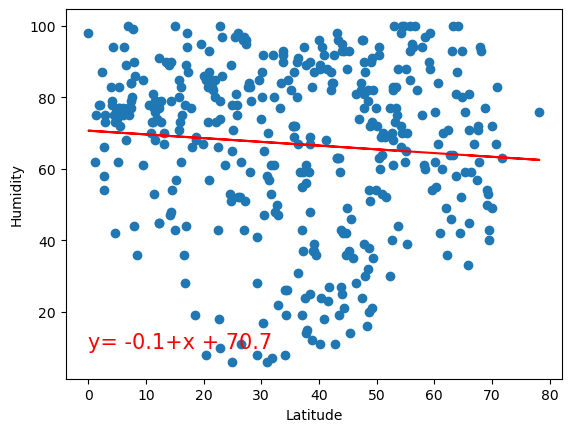

In [ ]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity")

The r-value is: 0.019141968971861344 


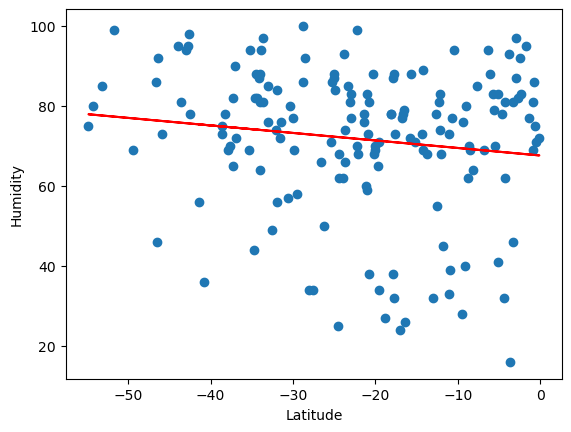

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity")

**Discussion about the linear relationship:** The Northern Hemisphere plot is showing the relationship between humidity and latitude starting at the equator and moving towards the North Pole. The Sourthern Hemisphere plot is showing the relationship between the humidity and latitude starting at the South Pole and moving towards the equator. Both plots have very low r values which indicates there is not a relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005323097207052942 


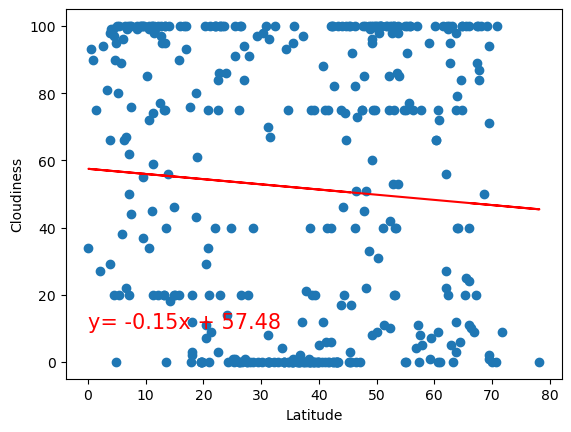

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

The r-value is: 0.020305757466795315 


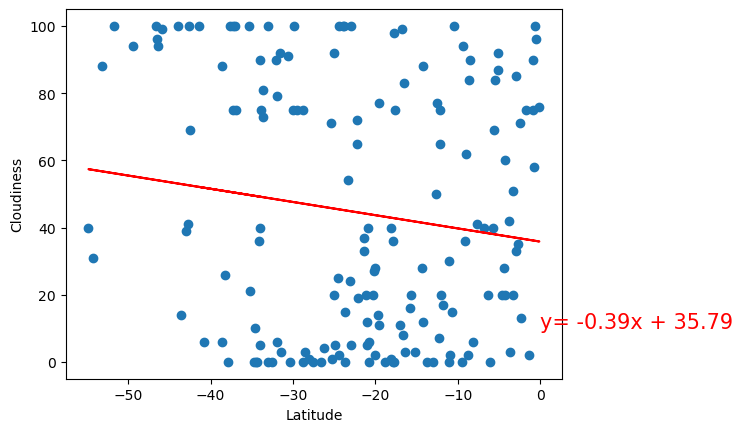

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

**Discussion about the linear relationship:** The Northern Hemisphere plot is showing the relationship between cloudiness and latitude starting at the equator and moving towards the North Pole. The Sourthern Hemisphere plot is showing the relationship between the cloudiness and latitude starting at the South Pole and moving towards the equator. Both plots have very low r values which indicates there is not a relationship between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013387969567745633 


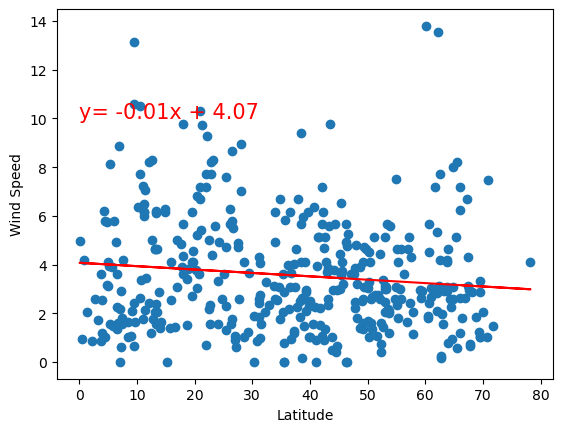

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

The r-value is: 0.0031032310666712594 


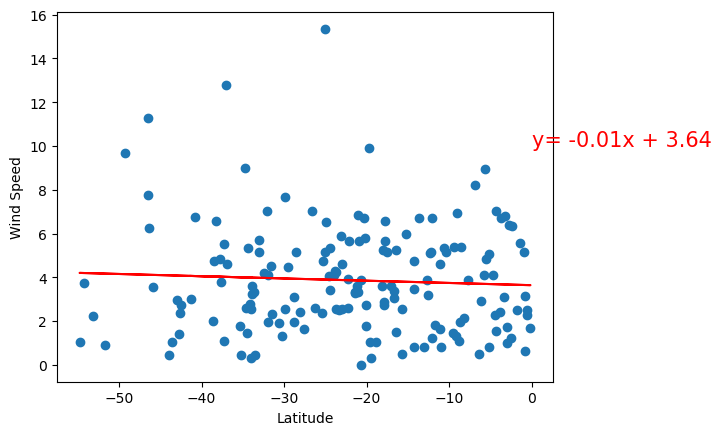

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

**Discussion about the linear relationship:** The Northern Hemisphere plot is showing the relationship between wind speed and latitude starting at the equator and moving towards the North Pole. The Sourthern Hemisphere plot is showing the relationship between the wind speed and latitude starting at the South Pole and moving towards the equator. Both plots have very low r values which indicates there is not a relationship between wind speed and latitude. 